## Zomato Data Analysis Project

### Step 1 - Importing Libraries

* pandas is used for data manipulation and analysis.
* numpy is used for numerical operations.
* matplotlib.pyplot and seaborn are used for data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2 - Create the dataframe

In [5]:
dataframe = pd.read_csv('E:/Python_Zomato_Analysis_Project/Zomato_data.csv')

In [6]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Convert the data type of column rate

In [10]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)

In [12]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### Check for missing values in the dataset

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


There are no missing values in this dataset

### Q1 What type of restaurant do the majority of customers order from

### Type of restaurant

In [14]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


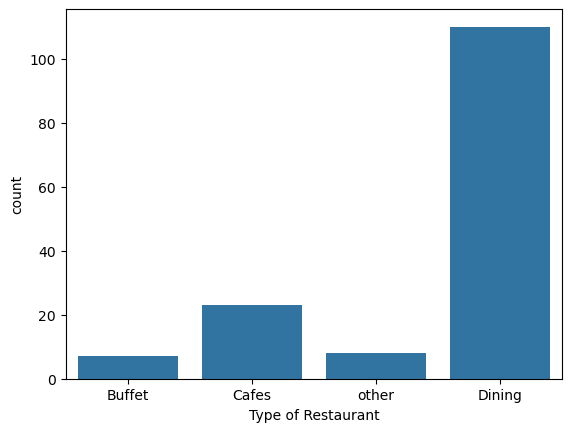

In [16]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")
plt.show()

Majority of the restaurants fall in dining category

### Q2 How many votes has each type of restaurant recieved from customers

In [17]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()


listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

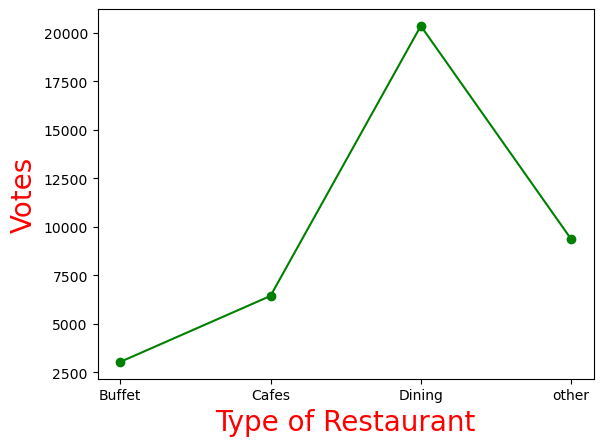

In [21]:
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green', marker='o')

plt.xlabel('Type of Restaurant', c='r', size=20)
plt.ylabel('Votes', c='red', size=20)
plt.show()

Dining restaurants have recieved the most number of votes.

### Q3 What is the rating that the majority of restaurants have recieved?

In [22]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


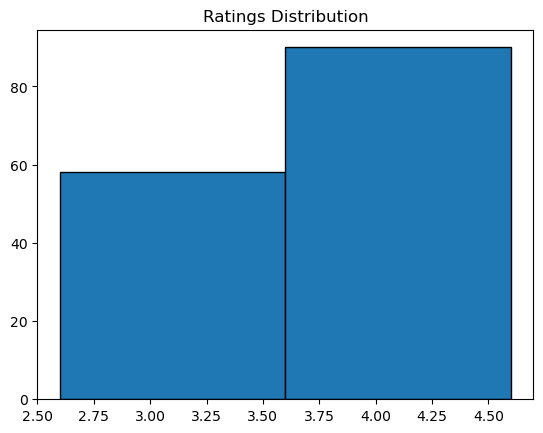

In [35]:
plt.hist(dataframe['rate'], bins=2, edgecolor='black')
plt.title('Ratings Distribution')
plt.show()

Majority of the restaurants recieved a rating between 3.5 and 4

### Q4 Zomato has observed that most couples order most of their food online. What is their average spending on each order?

Average order spending by couples

In [36]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


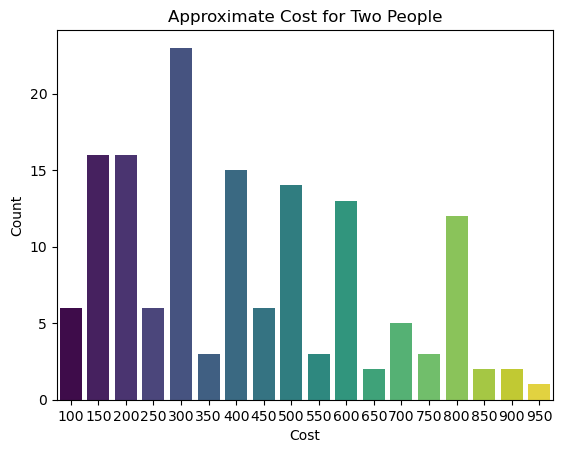

In [40]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, hue=couple_data, palette='viridis', legend=False)
plt.title("Approximate Cost for Two People")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.show()

The majority of couples prefer restaurants with an approximate cost of Rs 300.

### Q5 Which mode(online or offline) has received the maximum rating?

In [41]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


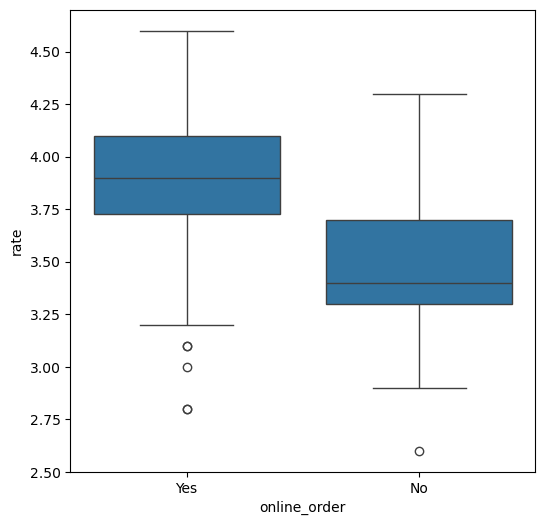

In [45]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = 'online_order', y = 'rate', data=dataframe)
plt.show()

Offline orders receive lower ratings in comparison to online orders.

### Q6 Which type of restaurant received more offline orders so that Zomato can provide some good offers to its customers?

In [46]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


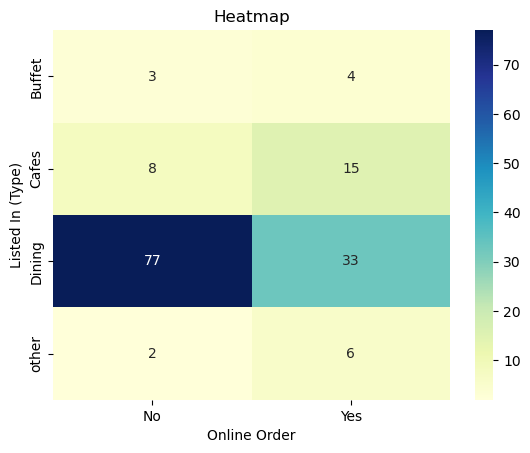

In [50]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that customers prefer ordering in person at restaurants, but prefer ordering online from cafes.